# Multiple Linear Regression using Scikit Learn

## Import Data

In [76]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [77]:
#Read Restaurant Profit Dara .csv file and divide the data into dependent and independent variables.
data = pd.read_csv('Restaurant_Profit_Data.csv')
data.head()

,Miscellaneous_Expenses,Food_Innovation_Spend,Advertising,City,Profit
0,138671.80,167497.20,475918.10,Chicago,202443.83
1,153151.59,164745.70,448032.53,Mumbai,201974.06
2,102919.55,155589.51,412068.54,Tokyo,201232.39
3,120445.85,146520.41,387333.62,Chicago,193083.99
4,93165.77,144255.34,370302.42,Tokyo,176369.94


In [78]:
#Check the shape of the data
data.shape

(50, 5)

## Categorical Variables to Dummys 

In [79]:
dummies = pd.get_dummies(data['City'],drop_first=True)
data = pd.concat([data.drop('City',axis=1),dummies],axis=1)
data.head()

,Miscellaneous_Expenses,Food_Innovation_Spend,Advertising,Profit,Mumbai,Tokyo
0,138671.80,167497.20,475918.10,202443.83,0,0
1,153151.59,164745.70,448032.53,201974.06,1,0
2,102919.55,155589.51,412068.54,201232.39,0,1
3,120445.85,146520.41,387333.62,193083.99,0,0
4,93165.77,144255.34,370302.42,176369.94,0,1


## Build Model

In [95]:
#Create Feature Matrix and Dependent Variable Vector
#X = data.iloc[:, :-1].values #-1 to exclude the last variable which is the DV
#y = data.iloc[:, 4].values

#Create Feature Matrix and Dependent Variable Vector

X = data[['Miscellaneous_Expenses','Food_Innovation_Spend','Advertising','Mumbai','Tokyo']].values
y = data['Profit'].values

### Split the data into training and test datasets


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Fitting Multiple Linear Regression to the Training set

In [97]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

### Print the constant and coeffcients

In [98]:
print(f'constant = {MLR.intercept_}')
print(f'coefficients = {MLR.coef_}')
MLR.score

constant = 51010.16100669447
coefficients = [ 3.01968165e-02  7.90840255e-01  3.10148566e-02 -3.04799573e+02
  1.58229418e+02]


<bound method RegressorMixin.score of LinearRegression()>

### Predicting the Test set results

In [99]:
y_predict = MLR.predict(X_test)

### Display actual and predicted values side by side

In [100]:
df = pd.DataFrame(data=y_test, columns=['y_test'])
df['y_predict'] = y_predict
df

,y_test,y_predict
0,113464.38,114464.764722
1,154441.40,142718.884992
2,156303.95,144092.850078
3,87980.83,82766.774894
4,201232.39,190102.927619
5,115190.31,124731.310792
6,91411.06,76626.432613
7,107665.56,108586.968401
8,120534.25,124681.828086
9,176369.94,179549.506399


<Axes: xlabel='y_test', ylabel='y_predict'>

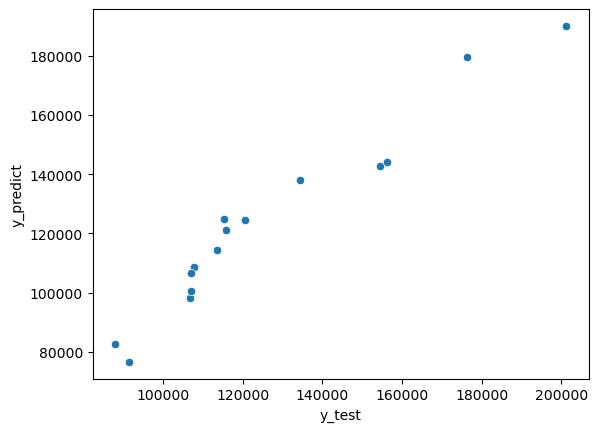

In [101]:
sns.scatterplot(data=df, x='y_test',y='y_predict')

## Evaluating the Model

In [102]:
#Model Evaluation using R-Square
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error:', r_square)

R-Square Error: 0.9358680970044453


## Predicting Single Observation

In [103]:
# Predicting the sigle observation results. Here 1,0 represents that the city is Mumbai
singl_obs = [122445.85,135589.51,423068.54,0,0]
feature_array = np.array(singl_obs)
feature_array = feature_array.reshape(1, -1)
y_pred_single_obs = MLR.predict(feature_array)
round(float(y_pred_single_obs), 2)

175058.69

In [104]:
#Model Evaluation using R-Square
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error:', r_square)

R-Square Error: 0.9358680970044453
